In [1]:
%pylab inline
from skimage import (
    io as dataio, 
    feature, 
    filters, 
    measure, 
    morphology, 
)

Populating the interactive namespace from numpy and matplotlib


# Opening the image

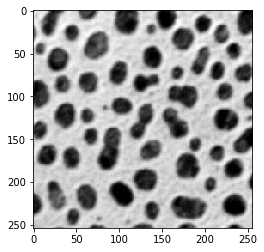

In [2]:
image = dataio.imread('https://imagej.nih.gov/ij/images/blobs.gif')
imshow(image, cmap='gray')

# Duplicate & renaming window not needed 😉, Moving straight to blurring! 

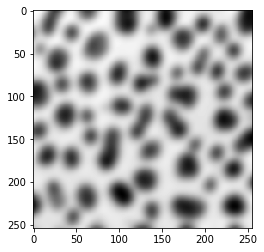

In [3]:
blurred = filters.gaussian(image, sigma=5)
imshow(blurred, cmap='gray')

# Finding maxima (and showing on plot)

Note:

* Instead of specifying "Light background" which means finding negative peaks, we simply find peaks in the negative image more explicitly
* By default peaks are returned in a 2d list of x,y points. 

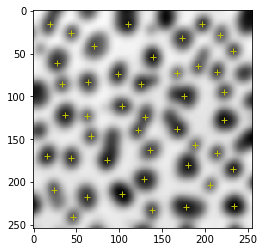

In [4]:
maxima = feature.peak_local_max(-blurred, min_distance=10)
imshow(blurred, cmap='gray')
plot(maxima[:, 1], maxima[:, 0], 'y+')

# Analysis 

In [11]:
maxima_image = feature.peak_local_max(-blurred, min_distance=10, indices=False)
props_table = measure.regionprops_table(
    measure.label(maxima_image), image, 
    properties=['centroid', 'max_intensity'])
import pandas as pd
pd.DataFrame(props_table)

centroid-0  centroid-1  max_intensity
0           15          19           31.0
1           15         110            7.0
2           16         197            7.0
3           26          44           23.0
4           28         218           87.0
5           32         173           39.0
6           41          70           47.0
7           47         233            7.0
8           54         139            7.0
9           61          27           47.0
10          65         192           39.0
11          71         214           23.0
12          73         167           55.0
13          74          98           23.0
14          83          63           39.0
15          85         126            7.0
16          86          33           31.0
17          95         222           23.0
18          99         176           23.0
19         111         103           39.0
20         122          37           39.0
21         123          62           39.0
22         124         130           55.0
23         127         222            7.0
24         138         168           15.0
25         139         122           39.0
26         146          67           23.0
27         157         188           47.0
28         163         136           39.0
29         166         214           55.0
30         170          16           39.0
31         172          44           31.0
32         174          86            7.0
33         180         180           23.0
34         185         233            7.0
35         197         129           47.0
36         203         206           71.0
37         209          24           55.0
38         214         103            7.0
39         218          62           55.0
40         228         234            7.0
41         229         178           23.0
42         233         138           47.0
43         241          46           31.0